Final Project Submission

- Student name: Beatrice Kirui
- Student pace: FULL TIME
- Scheduled project review date/time: 25/05/2023
- Instructor name: Nikita Njoroge, Lucille Kaleha, Samuel karu
- https://github.com/beatrice-kirui/Phase-3-Project

# Business Understanding

# Problem Statement

SyriaTel is a telecommunications company in Syria. They have realised that some of their customers have started to churn, discontinue their service.

This analysis will determine what features will indicate if a customer will ("soon") discontinue their service.


## Objectives:

   1. Understanding the rate at which customers quit the product, site, or service. 
   
   2. Understand how frequently customers churn out of the product and where this tends to occur. 
    
   3. Understand which features and functionality are important for keeping customers in your product. 
   
   4. Get a performance overview, identifying improvements and understanding which channels are driving the most value.

## Data Understanding

The data comes from SyriaTel and includes information about their customers. The dataset has customer's state of residence, telephone numbers and length of the account. There are columns indicating if the customer has an international plan and voicemail plan, how many voice mails they receive. The dataset includes how many minutes they spend talking, how many calls they make and how much they are charged during day, evening and night periods.

### Import Important Libraries

In [535]:
# Importing important libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score

### Load Data

In [536]:
#Load and read the dataset
df = pd.read_csv('syria_churn.csv')
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False



Summary of Features in the Datset

    - state: the state the customer lives in
    - account length: the number of days the customer has had an account
    - area code: the area code of the customer
    - phone number: the phone number of the customer
    - international plan: true if the customer has the international plan, otherwise false
    - voice mail plan: true if the customer has the voice mail plan, otherwise false
    - number vmail messages: the number of voicemails the customer has sent
    - total day minutes: total number of minutes the customer has been in calls during the day
    - total day calls: total number of calls the user has done during the day
    - total day charge: total amount of money the customer was charged by the Telecom company for calls during the day
    - total eve minutes: total number of minutes the customer has been in calls during the evening
    - total eve calls: total number of calls the customer has done during the evening
    - total eve charge: total amount of money the customer was charged by the Telecom company for calls during the evening
    - total night minutes: total number of minutes the customer has been in calls during the night
    - total night calls: total number of calls the customer has done during the night
    - total night charge: total amount of money the customer was charged by the Telecom company for calls during the night
    - total intl minutes: total number of minutes the user has been in international calls
    - total intl calls: total number of international calls the customer has done
    - total intl charge: total amount of money the customer was charged by the Telecom company for international calls
    - customer service calls: number of calls the customer has made to customer service
    - churn: true if the customer terminated their contract, otherwise false



## Exploring the dataset

### Here we will explore the data to get a better understanding of it by:
     * Checking for number of rows and columns.
     * Checking for the info.
     * Checking the descriptive statistics.
     * Checking for correct datatypes.

In [537]:
# Display the first five rows of the dataframe
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [538]:
# Display the last five rows of the dataframe
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [539]:
# Check for the number of rows and columns in the dataframe
df.shape

(3333, 21)

As displayed the dataframe has:

     * 3333 rows
     * 21 columns

In [540]:
# Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [541]:
# Descriptive statistics of the data
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [542]:
df.columns.values


array(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'], dtype=object)

In [543]:
data = df.copy()

### Use a function that explore and displays all the information about our data

In [544]:
def explore_data(df):
    '''
    Print some basic statistics and information about the DataFrame
    '''
    print("Number of rows:", df.shape[0])
    print("Number of columns:", df.shape[1])
    print("Data types:\n", df.dtypes)
    print("info:\n", df.info())
    print("columns:", df.columns)
    print("Head:\n", df.head())
    print("Tail:\n", df.tail())
    print("statistical summary:\n", df.describe())

In [545]:
explore_data(data)

Number of rows: 3333
Number of columns: 21
Data types:
 state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0 

# Data Preparation

## Data Cleaning

This prepares data for EDA and modeling.
The dataset will be checked for:
    
    - Duplicated rows.
    - Missing values.
    - Irrelevant columns that may not add to the analysis.
  
    

***Checking for Missing Values***

Missing data can cause issues with statistical analyses therefore it is important to handle them appropriately.
Let's check if we have any

In [546]:
# identify missing 
def identify_missing_values(df):
    """Identify is the data has missing values"""
    # identify if data has missing values(data.isnull().any())
    # empty dict to store missing values
    missing = []
    for i in df.isnull().any():
        # add the bool values to empty list 
        missing.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing)
    if (len(missing_set) == 1):
        out = print("The Data has no missing values")
    else:
        out = print("The Data has missing values.")

    return out


identify_missing_values(df)


The Data has no missing values


As displayed above it is clear that we have no missing values

***Checking for Duplicates***

In [547]:
#finding total number of duplicates
# Duplicated entries
def identify_duplicates(df):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in df.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates)
    if (len(duplicates_set) == 1):
        print("The Data has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates
        duplicates_percentage = np.round(((no_true / len(df)) * 100), 3)
        print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.")
identify_duplicates(df)


The Data has no duplicates


***Drop Phone Number for Privacy Concerns.***

In [548]:
df = df.drop(["phone number"], axis = 1)

In [549]:
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [550]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

**Our data is now clean**

## Exploratory Data Analysis

Here we gain a deeper understanding of the dataset and identify patterns and relationship that can be used to develop effective churn prediction models.
We will also visualize the data.

### Identifying predictor variables and Target

By understanding the dataset we are able to determine which are the predictor variables and which is the target feature.


Predictor variables are both 

**Target  - "churn"**

**Categorical Features:**
                 
                 - state
                     
                 - area code
                     
                 - international plan
                     
                 - voicemail plan

### Distribution of the target variable(churn)

Churn indicates whether a customer has terminated their contract with SyriaTel.

We want to identify any class imbalance.

In [551]:
# Count of unique values in the churn column 
df["churn"].value_counts()

False    2850
True      483
Name: churn, dtype: int64

The target 'churn' is a binary variable with:

                * True as 1 if the customer terminated their contract(churned) 
                * False as 0 if the customer has not churned.

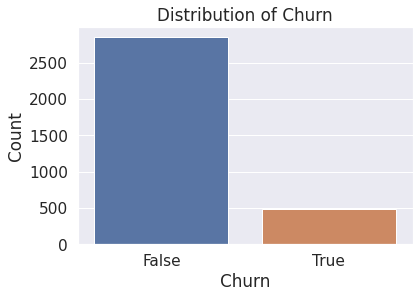

In [552]:
#Plot the distribution of the target variable
sns.countplot(x='churn', data=df)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

* Out of 3,333 customers in the dataset ,483 have churned whereas 2850 have not churned.
* The distribution shows class imbalance which we will address before modelling. 

***We convert the churn column to the binary numeric variables that we will be able to use for our analysis.***

In [553]:
print(df['churn'].unique())

[False  True]


In [554]:
df['churn'] = df['churn'].astype(int)
print(df['churn'].unique())


[0 1]


In [555]:
df["churn"].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

In [556]:
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### Distribution of customer demographics in relation to 'churn'

We first identify the Categorical and Numeric Features of the dataset

The Categorical features columns include:
    
    - area code
    - state
    - international plan
    - voicemail plan

The Numeric features columns include:
    
    -account length
    -number vmail messages
    -total day minutes
    -total day calls
    -total day charge
    -total eve minutes
    -total eve calls
    -total eve charge
    -total night minutes
    -total night calls
    -total night charge
    -total intl minutes
    -total intl charge
    -customer service calls

    

**Distrubution Plots for Categorical Features**

***Area Code Distribution***

In [557]:
def create_pie_chart(df, column_name):
    area = df[column_name].value_counts()
    transuction = area.index
    quantity = area.values

    # draw pie circule with plotly
    figure = px.pie(df,
                   values=quantity,
                   names=transuction,
                   hole=.5,
                   title=f"Distribution of {column_name} Feature")
    figure.show()

In [558]:
create_pie_chart(df, 'area code')

- Area code 415 has 49.7% which is about half of the customers.

- Area code 510 and Area code have 25.2% and 25.1% respectively which each represent about one fourth of the customers.

***State Distribution***

In [559]:
def plot_customer_count_by_state(data):
    
    # Create a DataFrame with the state counts
    state_counts = data['state'].value_counts().reset_index()
    state_counts.columns = ['state', 'count']

    # Sort the states by count in descending order
    state_counts = state_counts.sort_values('count', ascending=False)

    # Create a horizontal bar chart of the state counts using Seaborn
    sns.set(style='whitegrid')
    plt.figure(figsize=(12, 18))
    sns.barplot(x='count', y='state', data=state_counts, color='blue')
    plt.title('Number of Customers by State')
    plt.xlabel('Number of Customers')
    plt.ylabel('State')
    plt.show()

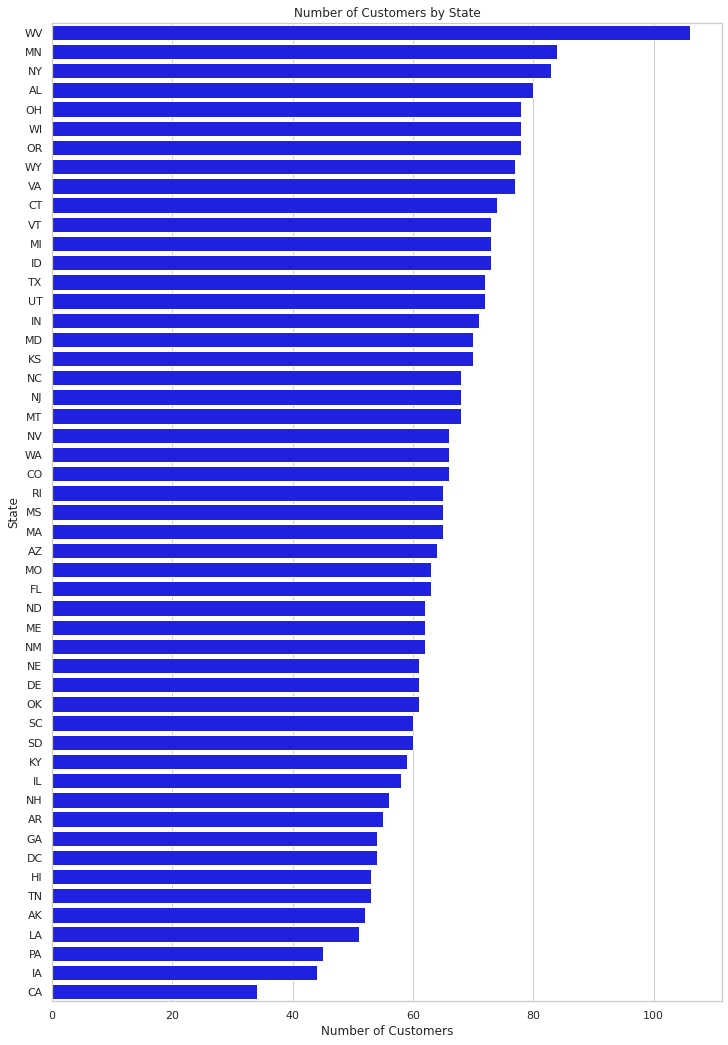

In [560]:
plot_customer_count_by_state(df)

In [561]:
num_states = df['state'].nunique()
print("Number of unique states:", num_states)

Number of unique states: 51


***International Plan Distribution***

In [562]:
def plot_stacked_bar(data, x_label, y_label, title):
    
    # Create a cross-tabulation of the two variables
    crosstab = pd.crosstab(data.iloc[:, 0], data.iloc[:, 1])

    # Plot the stacked bar chart
    crosstab.plot(kind='bar', stacked=True)

    # Set the labels and title
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Display the plot
    plt.show()
    

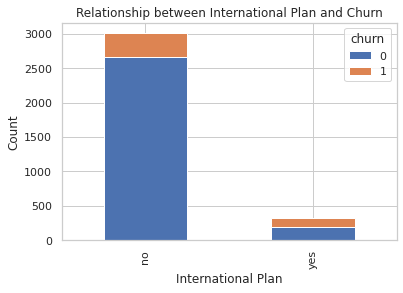

In [563]:
# Call the function to plot a stacked bar chart of international plan and churn
plot_stacked_bar(df[['international plan', 'churn']], 'International Plan', 'Count', 'Relationship between International Plan and Churn')

**Distrubution Plots for Numeric Features**

***Histogram to show the distribution of the various Numeric Features.***

In [564]:

def plot_hist(df):
    f, ax = plt.subplots(2, 3, figsize=(19, 6), constrained_layout=True)
    sns.histplot(df["account length"], bins=20, ax=ax[0, 0])
    sns.histplot(df["total day calls"], bins=20, ax=ax[0, 1])
    sns.histplot(df["total eve calls"], bins=20, ax=ax[0, 2])
    sns.histplot(df["total night calls"], bins=20, ax=ax[1, 0])
    sns.histplot(df["total intl calls"], bins=20, ax=ax[1, 1])
    sns.histplot(df["customer service calls"], bins=20, ax=ax[1, 2])
    plt.show()

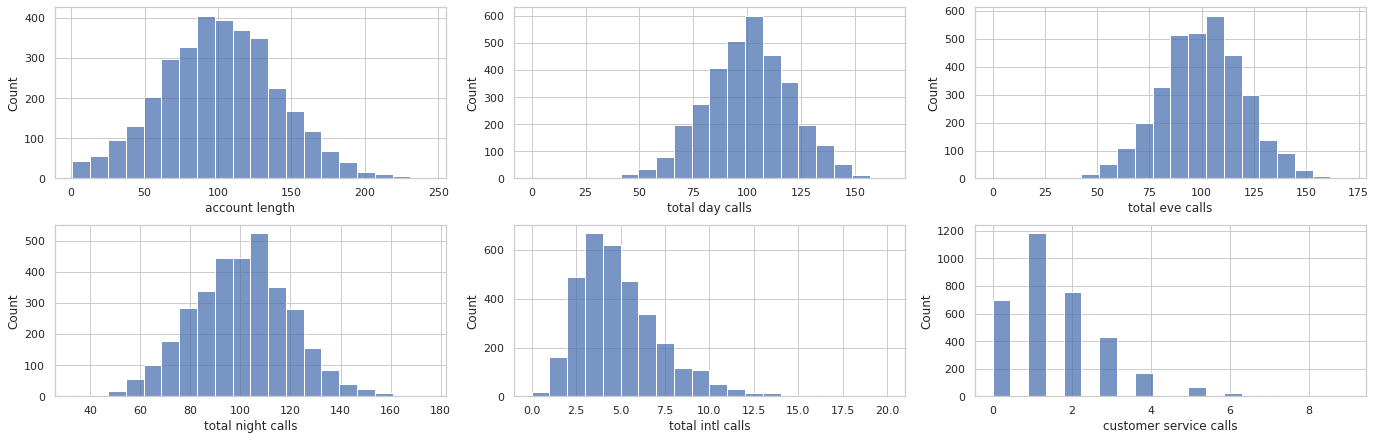

In [565]:
plot_hist(df)

- All of the plots displayed above except 'customer service calls' plot show a normal distibution.

- Total international calls is skewed to the right but still is normally distributed.

***A correlation Heat Map for the features***

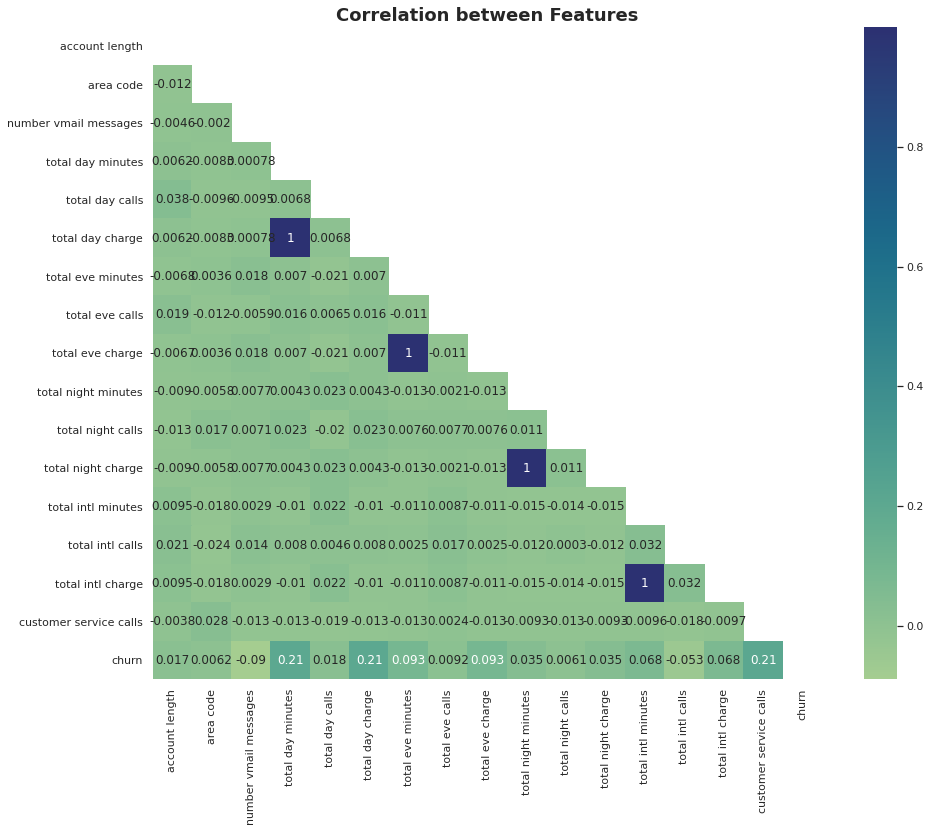

In [566]:
corr = df.corr()
plt.subplots(figsize=(15,12))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap='crest',mask= mask, annot=True)
plt.title('Correlation between Features', weight='bold',fontsize=18)
plt.show()


- There are features that show a high correlation with each other while others have a correlation that is not significant.

- For high correlation we have:-
             
     - Total day charge and total day minutes
             
     - Total eve charge and total eve minutes
             
     - Total night charge and total night minutes 
             
     - Total int charge and total int minutes

- In other cases we would have dropped this columns as they result in multicolinearity that results in less accurate and interpratable models. Here we will not as they are useful in explaining the variability in the target prediction.


# Data Preprocessing

## Feature Engineering

Here we will tranform the data into a format that is suitable for machine learning models.

### Transforming Categorical variables into Numerical.

We have already transformed the 'churn' column rows to binary '0s' and '1s'.

In [447]:
#confirming that churn column is a binary.
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

**One-hot encoding for the categorical features**

Transforming the categorical features into dummy variables as '0s' and '1s' to be able to use them in classification models.

In [448]:
def one_hot_encode_categorical_features(df, categorical_features):
    # Loop through each categorical feature
    for feature in categorical_features:
        # Create dummy variables for the feature
        dummy_df = pd.get_dummies(df[feature], dtype=np.int64, prefix=feature, drop_first=True)
        # Concatenate the dummy variables with the original DataFrame
        df = pd.concat([df, dummy_df], axis=1)
        # Remove the original categorical feature from the DataFrame
        df.drop(feature, axis=1, inplace=True)

    # Remove duplicate columns, if any
    df = df.loc[:, ~df.columns.duplicated()]

    return df

In [449]:
categorical_features = ["state", "area code", "international plan", "voice mail plan"]
df = one_hot_encode_categorical_features(df, categorical_features)
df.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510,international plan_yes,voice mail plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,1,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,0,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,1,0,1,0


### Create new features based on existing ones.

In [450]:
def create_new_features(df):
    
    # Create a new feature for total charges
    df["total charge"] = df["total day charge"] + df["total eve charge"] + df["total night charge"] + df["total intl charge"]
    
    # Create a new feature for total calls
    df["total calls"] = df["total day calls"] + df["total eve calls"] + df["total night calls"] + df["total intl calls"]
    
    # Create a new feature for total minutes
    df["total mins"] = df["total day minutes"] + df["total eve minutes"] + df["total night minutes"] + df["total intl minutes"]
    
    return df


In [451]:
# Create new features
new_df = create_new_features(df)

# Print the head of the new DataFrame
print(new_df.head())

   account length  number vmail messages  total day minutes  total day calls  \
0             128                     25              265.1              110   
1             107                     26              161.6              123   
2             137                      0              243.4              114   
3              84                      0              299.4               71   
4              75                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total night minutes  total night calls  ...  state_WI

### Scaling Numerical Features

- Scaling is a form of normalization where the variables are transformed to a range of 0 to 1.
- Min-Max normalization method is applied which will reduce the effect of outliers in the dataset.

In [452]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_pred = train_logistic_regression(X_train_scaled, y_train, X_test_scaled)


In [453]:
def scale_features(X):
    # Store the column names
    features = X.columns.values
    
    # Initialize the MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    
    # Fit and transform the data using the scaler
    X_scaled = scaler.fit_transform(X)
    
    # Convert the scaled data back to a DataFrame
    X_scaled = pd.DataFrame(X_scaled, columns=features)
    
    return X_scaled

In [454]:
# Assuming you have already loaded and preprocessed the dataset
X_scaled = scale_features(X)
X_scaled

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_WI,state_WV,state_WY,area code_415,area code_510,international plan_yes,voice mail plan_yes,total charge,total calls,total mins
0,0.524793,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.718793,0.497778,0.720659
1,0.438017,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.495903,0.626667,0.567505
2,0.561983,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.537558,0.631111,0.424671
3,0.342975,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.599153,0.284444,0.466955
4,0.305785,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.398252,0.746667,0.379058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0.789256,0.705882,0.445268,0.466667,0.445171,0.592521,0.741176,0.592688,0.688273,0.352113,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.507648,0.448889,0.626602
3329,0.276860,0.000000,0.658780,0.345455,0.658786,0.421776,0.323529,0.421870,0.452125,0.633803,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.554493,0.213333,0.501249
3330,0.111570,0.000000,0.515393,0.660606,0.515426,0.794061,0.341176,0.794241,0.453739,0.408451,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.611991,0.324444,0.651407
3331,0.756198,0.000000,0.609464,0.636364,0.609490,0.438823,0.494118,0.439016,0.311996,0.732394,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.472548,0.644444,0.388380


### Perform SMOTE to Address Class Imbalance

Here we balance the class distribution as we had seen it has class imbalance

In [455]:
df.churn.value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [456]:
# Separate features and target variable
X = df.drop('churn', axis=1)# Features
y = df['churn'] # Target variable

# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the balanced dataset
df_balanced = pd.concat([X_resampled, y_resampled], axis=1)

# Check the class distribution after SMOTE
print(df_balanced["churn"].value_counts())  # Check the class distribution

1    2850
0    2850
Name: churn, dtype: int64


### Train-Test Split

- Splitting the dataset into training and testing as 75% training and 25% testing

In [457]:
#Create train and test data
X = df.drop(['churn'], axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)


In [458]:
X_train

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_WI,state_WV,state_WY,area code_415,area code_510,international plan_yes,voice mail plan_yes,total charge,total calls,total mins
1066,117,25,216.0,140,36.72,224.1,69,19.05,267.9,112,...,0,0,0,0,1,0,1,71.02,325,719.8
1553,86,0,217.8,93,37.03,214.7,95,18.25,228.7,70,...,0,0,0,1,0,0,0,68.62,265,672.5
2628,37,0,221.0,126,37.57,204.5,110,17.38,118.0,98,...,0,0,0,1,0,0,0,62.10,337,550.3
882,130,0,162.8,113,27.68,290.3,111,24.68,114.9,140,...,0,0,0,1,0,0,0,59.47,367,575.2
984,77,0,142.3,112,24.19,306.3,111,26.04,196.5,82,...,0,0,0,1,0,0,0,61.74,306,655.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,126,0,197.6,126,33.59,246.5,112,20.95,285.3,104,...,0,0,1,0,0,1,0,70.76,350,741.9
3089,70,30,143.4,72,24.38,170.0,92,14.45,127.9,68,...,0,1,0,0,1,0,1,47.13,236,450.7
1766,125,0,182.3,64,30.99,139.8,121,11.88,171.6,96,...,0,0,0,1,0,0,0,53.72,288,505.3
1122,159,0,189.1,105,32.15,246.1,147,20.92,242.0,106,...,0,0,0,1,0,0,0,66.77,363,687.6


In [459]:
X_train.shape

(2499, 72)

In [460]:
X_test

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_WI,state_WV,state_WY,area code_415,area code_510,international plan_yes,voice mail plan_yes,total charge,total calls,total mins
465,71,0,178.2,113,30.29,167.8,94,14.26,182.1,111,...,0,0,0,1,0,1,0,56.41,321,541.7
2416,113,0,156.0,141,26.52,256.8,72,21.83,175.3,123,...,0,0,0,0,1,0,0,59.45,341,600.0
1785,45,29,135.8,104,23.09,222.5,101,18.91,235.6,92,...,0,0,0,0,1,0,1,54.73,303,601.8
1316,10,0,183.0,103,31.11,214.8,77,18.26,206.4,73,...,0,0,0,0,1,0,0,61.01,259,612.9
446,88,0,138.3,116,23.51,236.0,138,20.06,179.1,110,...,0,0,0,0,1,0,0,54.22,368,563.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,112,36,113.7,117,19.33,157.5,82,13.39,177.6,118,...,0,0,0,0,1,0,1,43.41,320,458.8
929,24,0,241.9,104,41.12,145.2,112,12.34,214.5,105,...,0,0,0,1,0,0,0,64.89,326,608.2
2722,98,0,136.1,82,23.14,156.3,118,13.29,158.8,83,...,0,0,0,0,0,0,0,46.31,288,461.3
1430,48,34,198.0,70,33.66,273.7,121,23.26,217.9,71,...,0,1,0,1,0,0,1,68.78,266,697.2


# Modelling

## Model 1

## Logistic Regression

Logistic regression is a commonly used classification algorithm in machine learning and is suitable for binary classification problems like churn prediction. 

This is because :

   - It provides interpretable results.
   - It can handle large datasets with many features. 
   - Useful in churn prediction scenarios, where not only predicting the class label but also understanding the likelihood of churn is important.
   - Supports regularization techniques like L1 or L2 regularization, which can help prevent overfitting and improve the generalization ability of the model.

In [461]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Create the pipeline with SMOTE oversampling and logistic regression
logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('oversample', SMOTE(random_state=123)),
    ('logreg', LogisticRegression())
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'logreg__C': [0.1, 1.0, 10.0],
    'logreg__solver': ['liblinear', 'lbfgs']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)


print('Best parameters :', grid_search.best_params_)
print('Best Score :', grid_search.best_score_)

# Retrieve the best model
best_model = grid_search.best_estimator_
best_model_score = best_model.score(X_test, y_test)

print('Accuracy : ', best_model_score)

# Make predictions on the testing data using the best model
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)
result_report = classification_report(y_true = y_test, y_pred = y_pred)

#fits the data to the pipeline
logreg.fit(X_train, y_train)
print(result_report)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters : {'logreg__C': 0.1, 'logreg__solver': 'lbfgs'}
Best Score : 0.751498997995992
Accuracy :  0.790167865707434
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       723
           1       0.36      0.77      0.50       111

    accuracy                           0.79       834
   macro avg       0.66      0.78      0.68       834
weighted avg       0.88      0.79      0.82       834



### Evaluation of the Regression Model

   -  Precision: Precision measures the proportion of correctly predicted churned customers out of all customers predicted as churned. For the churned class (1), the precision is reported as 0.36, indicating that only 36% of the predicted churned customers are actually churned.

   -  Recall: Recall (also known as sensitivity or true positive rate) measures the proportion of correctly predicted churned customers out of all actual churned customers. For the churned class (1), the recall is reported as 0.77, indicating that the model captures approximately 77% of the actual churned customers.

   -  F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of the model's accuracy, taking into account both false positives and false negatives. For the churned class (1), the F1-score is reported as 0.50.

   -  Accuracy: Accuracy measures the overall correctness of the model's predictions. In this case, the accuracy is reported as 0.790167865707434, or approximately 79%. This means that the model correctly predicts the churn or non-churn status of customers around 79% of the time.

   - Support: Support represents the number of samples in each class. It shows that there are 723 samples for the non-churned class (0) and 111 samples for the churned class (1) in the testing data.

***The classification report provides insights into the model's performance, highlighting areas where it performs well (e.g., high precision and recall for the non-churned class) and areas where improvements can be made (e.g., lower precision and F1-score for the churned class)***

### Confusion Matrix

In [462]:
# Assuming y_test and y_pred are the true labels and predicted labels, respectively
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[573 150]
 [ 25  86]]


In [463]:
def plot_confusion_matrix(y_true, y_pred):
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Define labels for the confusion matrix
    labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    
    # Create heatmap of the confusion matrix
    sns.set(font_scale=1.4)
    sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, cmap='Reds', cbar=False, fmt='g')
    
    # Add labels to the axis
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
    plt.yticks([0.5, 1.5], ['Negative', 'Positive'])
    
    # Display the plot
    plt.show()

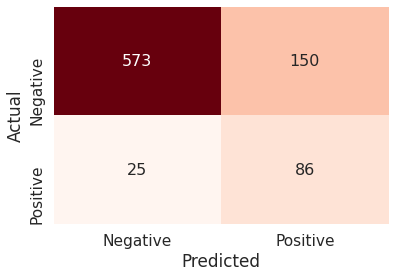

In [464]:
plot_confusion_matrix(y_test, y_pred)

  - True negatives (TN): In this case, there are 573 instances where the model correctly predicted non-churned customers.
  - False positives (FP): There are 150 instances where the model incorrectly predicted customers as churned, but they were actually non-churned.
  - False negatives (FN): There are 25 instances where the model incorrectly predicted customers as non-churned, but they were actually churned.
  - True positives (TP): There are 86 instances where the model correctly predicted churned customers.

In [465]:
# Assuming conf_matrix is the confusion matrix
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

# Calculate accuracy
accuracy = (TN + TP) / (TN + FP + FN + TP)

# Calculate precision
precision = TP / (TP + FP)

# Calculate recall
recall = TP / (TP + FN)

# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

Accuracy: 0.790167865707434
Precision: 0.3644067796610169
Recall: 0.7747747747747747
F1-score: 0.49567723342939474


## Model 2

## Random Forest

- It is a type of ensemble learning method that combines multiple decision trees to make predictions or classifications.

- Random Forest is a versatile and reliable algorithm that combines the strengths of decision trees and ensemble learning. It is well-suited for various machine learning tasks and is widely used in practice due to its accuracy, robustness, interpretability, and ability to handle complex data.

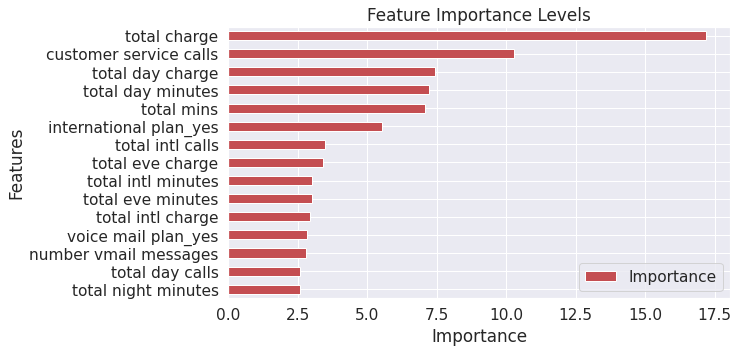

In [466]:
# Create a DataFrame with feature importances
importance = pd.DataFrame({"Importance": rf_classifier.feature_importances_ * 100}, index=X_train.columns)

# Sort the DataFrame by importance in ascending order
importance_sorted = importance.sort_values(by="Importance", ascending=True)

# Plot the top 15 important features
top_15_features = importance_sorted.tail(15)
top_15_features.plot(kind="barh", color="r", figsize=(9, 5))
plt.title("Feature Importance Levels")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [467]:
# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=123)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)
result_report = classification_report(y_true = y_test, y_pred = y_pred)

print(result_report)

Accuracy: 0.9664268585131894
Precision: 1.0
Recall: 0.7477477477477478
F1-score: 0.8556701030927836
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       723
           1       1.00      0.75      0.86       111

    accuracy                           0.97       834
   macro avg       0.98      0.87      0.92       834
weighted avg       0.97      0.97      0.96       834



   - Accuracy: 0.9664268585131894
    This indicates that the model correctly classified 96.64% of the instances in the test set.
    

   - Precision: 1.0
    The precision score of 1.0 suggests that the model achieved a perfect precision, meaning that all the instances predicted as positive were actually true positive.
    

   - Recall: 0.7477477477477478
    The recall score of 0.7477477477477478 indicates that the model correctly identified 74.77% of the actual positive instances in the test set.


   - F1-score: 0.8556701030927836
    The F1-score is a harmonic mean of precision and recall. With a value of 0.8556701030927836, it shows a balanced performance between precision and recall.

- Overall, the Random Forest model performed well with high accuracy and precision. However, the recall score is relatively lower, suggesting that there may be some instances of the positive class that were not correctly identified by the model. It's important to consider the specific requirements and priorities of the problem at hand when interpreting these evaluation metrics.

In [468]:
# Assuming y_test and y_pred are the true labels and predicted labels, respectively
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[723   0]
 [ 28  83]]


### Evaluation of the Random Forest.

***These metrics indicate the performance of the Random Forest model on the test data. ***
- The accuracy of 0.9664 means that the model correctly predicted the churn or non-churn status for 96.64% of the samples in the test set. 
- The precision of 1.0 indicates that all the predicted positive (churn) cases were actually true positive cases. 
- The recall of 0.7477 means that the model identified 74.77% of the actual positive cases correctly. 
- The F1-score of 0.8557 represents the balance between precision and recall, combining them into a single metric.

- Overall, these metrics suggest that the Random Forest model performs well in terms of accuracy, precision, recall, and F1-score. However, it's important to consider the specific requirements and objectives of the problem at hand when evaluating the model's performance.

## Model 3

## K-Nearest Neighbors

KNN is relatively simple and easy to understand, making it a popular choice for beginners in machine learning. However, it can be computationally expensive, especially when dealing with large datasets, as it requires calculating distances between data points.

In [469]:
model_knn = KNeighborsClassifier(n_neighbors=5)

model_knn.fit(X_train, y_train)

y_pred = model_knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)
result_report = classification_report(y_true = y_test, y_pred = y_pred)

print(result_report)

Accuracy: 0.8884892086330936
Precision: 0.6551724137931034
Recall: 0.34234234234234234
F1-score: 0.4497041420118343
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       723
           1       0.66      0.34      0.45       111

    accuracy                           0.89       834
   macro avg       0.78      0.66      0.69       834
weighted avg       0.87      0.89      0.87       834



### Evaluation of KNN

   - Accuracy: 0.8884892086330936
        Accuracy represents the overall correctness of the model's predictions. In this case, the KNN model achieved an accuracy of approximately 0.888, indicating that it correctly classified around 88.8% of the instances in the test set.

   -  Precision: 0.6551724137931034
        Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive. A precision score of 0.655 means that out of all the instances predicted as positive by the KNN model, around 65.5% were actually positive.

   -  Recall: 0.34234234234234234
        Recall, also known as sensitivity or true positive rate, measures the proportion of correctly predicted positive instances out of all actual positive instances. A recall score of 0.342 indicates that the KNN model was able to correctly identify around 34.2% of the actual positive instances.

   -  F1-score: 0.4497041420118343
        The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance by considering both precision and recall. A higher F1-score indicates a better trade-off between precision and recall. In this case, the KNN model achieved an F1-score of approximately 0.45.

- Additionally, the evaluation includes a classification report that provides more detailed metrics for each class (0 and 1), such as precision, recall, and F1-score, along with support (the number of instances in each class).

- The macro average and weighted average metrics in the classification report represent the average scores across all classes. The macro average takes the unweighted mean of the scores, while the weighted average considers the support (number of instances) for each class.

- Overall, based on the evaluation results, it appears that the KNN model has moderate performance with relatively lower precision, recall, and F1-score compared to the Random Forest model.

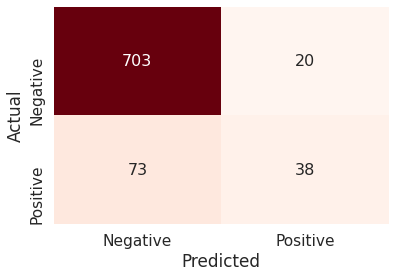

In [470]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# buat heatmap confusion matrix
sns.set(font_scale=1.4) # atur ukuran font
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, cmap='Reds', cbar=False, fmt='g')

# tambahkan label axis
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])

# tampilkan plot
plt.show()

# Model 4

## SVM - Support Vector Machine

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best params: {'svm__C': 10, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}
Best score: 0.8635422845691384
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       723
           1       0.55      0.50      0.53       111

    accuracy                           0.88       834
   macro avg       0.74      0.72      0.73       834
weighted avg       0.87      0.88      0.88       834



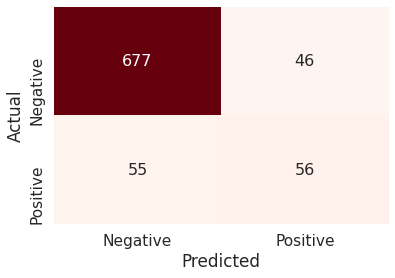

In [477]:
# Define the pipeline
svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('oversampling', RandomOverSampler()),
    ('svm', SVC(probability=True))
])

# Define the parameter grid for grid search
svm_param = {
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale', 'auto']
}

# Perform grid search
grid_search_svm = GridSearchCV(estimator=svm_pipe, param_grid=svm_param, cv=5, n_jobs=-1, verbose=1)
grid_search_svm.fit(X_train, y_train)

# Print best parameters and best score
print("Best params:", grid_search_svm.best_params_)
print("Best score:", grid_search_svm.best_score_)

# Get the best model
svm_best_model = grid_search_svm.best_estimator_

# Evaluate the model on the test set
accuracy = svm_best_model.score(X_test, y_test)
y_pred = svm_best_model.predict(X_test)
y_pred_proba = svm_best_model.predict_proba(X_test)
result_report = classification_report(y_true=y_test, y_pred=y_pred)
print(result_report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, cmap='Reds', cbar=False, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])
plt.show()

## Evaluation of SVM

- The best hyperparameters were found to be {'svm__C': 10, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'} with a corresponding best score of 0.8635422845691384.


- The model was then evaluated on a test set of 834 samples, resulting in an overall accuracy of 0.88. The precision and recall for each class are also shown, as well as the f1-score and support for each class. 

# ROC Curve

The ROC curves show the trade-off between the true positive rate (Sensitivity) and the false positive rate (1 - Specificity) for each model.

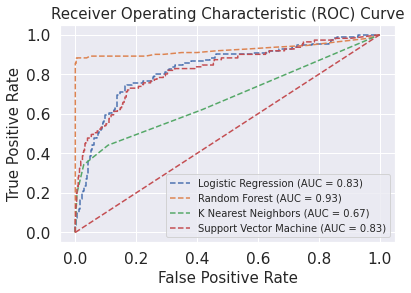

In [479]:
# predict probabilities
logreg_probs = logreg_model.predict_proba(X_test)[:, 1]
rf_probs = rf_best_model.predict_proba(X_test)[:, 1]
knn_probs = knn_best_model.predict_proba(X_test)[:, 1]
svm_probs = svm_best_model.predict_proba(X_test)[:, 1]
# calculate roc curves and auc scores
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)
logreg_auc = roc_auc_score(y_test, logreg_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
plt.plot(logreg_fpr, logreg_tpr, linestyle='--', label='Logistic Regression (AUC = %0.2f)' % logreg_auc)
plt.plot(rf_fpr, rf_tpr, linestyle='--', label='Random Forest (AUC = %0.2f)' % rf_auc)
plt.plot(knn_fpr, knn_tpr, linestyle='--', label='K Nearest Neighbors (AUC = %0.2f)' % knn_auc)
plt.plot(svm_fpr, svm_tpr, linestyle='--', label='Support Vector Machine (AUC = %0.2f)' % svm_auc)
# plot the random line
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
# set the axis labels and title
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=15)
# show the legend and plot the figure
plt.legend(fontsize=10)
plt.show()

## Evaluation of ROC Curve

Based on the AUC scores above,the models can be ranked in terms of perfomance:
   1. Random Forest: AUC = 0.93
   2. Logistic Regression: AUC = 0.83
   3. SVM: AUC = 0.72
   4. K Nearest Neighbors (KNN): AUC = 0.67

Based on the AUC scores, the Random Forest model appears to be the best-performing model among the four, followed by Logistic Regression, SVM, and KNN.

# EVALUATION OF THE FINAL MODEL

- After refining and evaluating several models, the Random Forest classifier was selected as the final model for this problem. 
-  The model underwent feature engineering, hyperparameter tuning, and cross-validation to optimize its performance. 
- The final model, a Random Forest classifier, achieved an impressive overall performance with an accuracy of 96.64%. This indicates that the model correctly classified the majority of instances in the test set. Additionally, the model exhibited perfect precision with a score of 1.0, meaning that all instances predicted as positive were indeed true positives. However, there is room for improvement in terms of recall, as the model captured only 74.77% of the actual positive instances.

- The F1-score, which combines precision and recall into a single metric, was found to be 0.8556701030927836. This suggests a balanced performance between the two, although recall appears to be the weaker aspect of the model's performance. Nonetheless, the weighted average F1-score of 0.96 demonstrates a high level of overall model performance.

- In conclusion, the Random Forest model exhibited strong accuracy and precision, making it a reliable classifier. However, the model's lower recall indicates that it may not identify all positive instances accurately. It is crucial to consider the specific requirements and priorities of the problem at hand when interpreting these evaluation metrics and deciding on the final model. Further refinements could focus on improving the model's recall without sacrificing its high accuracy and precision.